# INDIVIDUAL ASSIGNMENT- MARIJOSE MARCOS I.

In [1]:
#IMPORT LIBRARIES AND SET ENVIRONMENT
# Set environment params
Sys.setenv(LANG='en')  # English


# Import libraries
library(nnet)
library(randomForest)  # Random Forest
library(readr)
library(ISLR)    
library(MASS)     
library(readr)
library(mlr)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.



In [276]:
#MORE PACKAGE INSTALLATION
install.packages(c("data.table", "mlr3", "caret", "ggplot2", "plotrix", "rgl", "ISLR", "MASS", "datasets"))
install.packages(c("mlr", "pROC", "e1071", "gridExtra", "kknn", "nnet", "dummies"))
install.packages('mlr')

install.packages("checkmate")
install.packages("mlr",dependencies=TRUE)
library(mlr)
install.packages("mlr3")
library(mlr3)

Warning message:
"packages 'mlr3', 'caret', 'ggplot2', 'ISLR', 'MASS', 'datasets' are in use and will not be installed"


package 'data.table' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'data.table'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\tools\Anaconda3\envs\r-env\Lib\R\library\00LOCK\data.table\libs\x64\datatable.dll to C:\tools\Anaconda3\envs\r-env\Lib\R\library\data.table\libs\x64\datatable.dll: Permission denied"
Warning message:
"restored 'data.table'"


package 'plotrix' successfully unpacked and MD5 sums checked
package 'rgl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mmarcosiglesias\AppData\Local\Temp\RtmpEnVKRp\downloaded_packages


Warning message:
"packages 'mlr', 'pROC', 'nnet' are in use and will not be installed"


package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\tools\Anaconda3\envs\r-env\Lib\R\library\00LOCK\e1071\libs\x64\e1071.dll to C:\tools\Anaconda3\envs\r-env\Lib\R\library\e1071\libs\x64\e1071.dll: Permission denied"
Warning message:
"restored 'e1071'"


package 'gridExtra' successfully unpacked and MD5 sums checked
package 'kknn' successfully unpacked and MD5 sums checked
package 'dummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mmarcosiglesias\AppData\Local\Temp\RtmpEnVKRp\downloaded_packages


Warning message:
"package 'mlr' is in use and will not be installed"


package 'checkmate' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'checkmate'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\tools\Anaconda3\envs\r-env\Lib\R\library\00LOCK\checkmate\libs\x64\checkmate.dll to C:\tools\Anaconda3\envs\r-env\Lib\R\library\checkmate\libs\x64\checkmate.dll: Permission denied"
Warning message:
"restored 'checkmate'"



The downloaded binary packages are in
	C:\Users\mmarcosiglesias\AppData\Local\Temp\RtmpEnVKRp\downloaded_packages


Warning message:
"package 'mlr' is in use and will not be installed"
Warning message:
"package 'mlr3' is in use and will not be installed"


In [11]:
#SET PATH
setwd("C:/Users/mmarcosiglesias/OneDrive - IESEG/Desktop/Machine Learning Individual Assignment")
bank <- read.csv("C:/Users/mmarcosiglesias/OneDrive - IESEG/Desktop/Machine Learning Individual Assignment/bank_mkt_train.csv")


# DATA PRE-PROCESSING

In [ ]:
#THE DATA WAS SPLIT AND PROCESSED SEPARATELY FOR TRAIN AND TEST TO REDUCE AND AVOID DATA LEAKAGE AS MUCH AS POSSIBLE

# DATA PRE- PROCESSING FOR TRAIN

In [12]:
#SPLIT THE DATA TO PREPARE DATA FOR FITTING THE MODELS
set.seed(42)
train_bank_set <- sample(nrow(bank)*0.8)
train <- bank[train_bank_set, ]
test <- bank[-train_bank_set, ]

In [13]:
#NORMALIZE TRAIN AND TEST FOR BETTER MODEL PERFORMANCE
train_knn_l <- train
test_knn_l  <- test

In [14]:
#CHECK FOR MISSING VALUES
sapply(train, function(x) sum(is.na(x)))

client_id            age            job        marital      education 
             0            154            127            168            131 
       default        housing           loan        contact          month 
           165            154            172            170            159 
   day_of_week       campaign          pdays       previous       poutcome 
           143            160            142            171            142 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
           134            140            161            164            148 
     subscribe 
             0

In [15]:
#NORMALIZE NUMERIC VARIABLES ONLY ON BOTH TRAIN AND TEST
train$age<-scale(train$age)
train$campaign<-scale(train$campaign)
train$emp.var.rate<-scale(train$emp.var.rate)
train$cons.price.idx<-scale(train$cons.price.idx)
train$euribor3m<-scale(train$euribor3m)
train$nr.employed<-scale(train$nr.employed)

test$age<-scale(test$age)
test$campaign<-scale(test$campaign)
test$emp.var.rate<-scale(test$emp.var.rate)
test$cons.price.idx<-scale(test$cons.price.idx)
test$euribor3m<-scale(test$euribor3m)
test$nr.employed<-scale(test$nr.employed)



In [17]:
#DEFINE FUNCTION TO GET MODE
# Source: https://www.tutorialspoint.com/r/r_mean_median_mode.htm#:~:text=R%20does%20not%20have%20a,the%20mode%20value%20as%20output.
getmode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [18]:
#REPLACE NA'S OF CATEGORICAL VARIABLES BY THE MODE OF THE COLUMN
train$job[is.na(train$job)] <- getmode(train$job)  

train$marital[is.na(train$marital)] <- getmode(train$marital) 

train$education[is.na(train$education)] <- getmode(train$education) 

train$default[is.na(train$default)] <- getmode(train$default) 

train$housing[is.na(train$housing)] <- getmode(train$housing)  

train$loan[is.na(train$loan)] <- getmode(train$loan)

train$contact[is.na(train$contact)] <- getmode(train$contact)  

train$month[is.na(train$month)] <- getmode(train$month)  

train$day_of_week[is.na(train$day_of_week)] <- getmode(train$day_of_week) 

train$poutcome[is.na(train$poutcome)] <- getmode(train$poutcome)  

train$age[is.na(train$age)] <- getmode(train$age)

train$campaign[is.na(train$campaign)] <- getmode(train$campaign)  

train$pdays[is.na(train$pdays)] <- getmode(train$pdays)  

train$previous[is.na(train$previous)] <- getmode(train$previous)  

train$emp.var.rate[is.na(train$emp.var.rate)] <- mean(train$emp.var.rate,na.rm=TRUE)

train$cons.price.idx[is.na(train$cons.price.idx)] <- getmode(train$cons.price.idx)

train$cons.conf.idx[is.na(train$cons.conf.idx)] <- mean(train$cons.conf.idx,na.rm=TRUE)

train$euribor3m[is.na(train$euribor3m)] <- mean(train$euribor3m,na.rm=TRUE)  

train$nr.employed[is.na(train$nr.employed)] <- mean(train$nr.employed, na.rm=TRUE)

In [19]:
#CHECK FOR NA's TO SEE IF IT WORKED
sapply(train, function(x) sum(is.na(x)))

client_id            age            job        marital      education 
             0              0              0              0              0 
       default        housing           loan        contact          month 
             0              0              0              0              0 
   day_of_week       campaign          pdays       previous       poutcome 
             0              0              0              0              0 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
             0              0              0              0              0 
     subscribe 
             0

In [20]:
#ENCODE CATEGORICAL VARIABLES BY REPLACING THEM FOR NUMBERS WITH IFELSE 


train$job <- ifelse(train$job == 'management',1, ifelse(train$job ==  'unemployed',2, ifelse(train$job =='technician',3,ifelse(train$job =='services',4, ifelse(train$job =='unknown',5, ifelse(train$job =='blue-collar',6, ifelse(train$job =='admin.',7, ifelse(train$job =='entrepreneur',8, ifelse(train$job =='retired',9, ifelse(train$job =='housemaid',10,ifelse(train$job =='student',11, ifelse(train$job =='self-employed',12,train$job))))))))))))

unique(train$marital)
unique(train$education)


train$marital <- ifelse(train$marital == 'married',1, ifelse(train$marital ==  'single',2, ifelse(train$marital =='divorced',3, ifelse(train$job =='unknown',4,train$job))))

unique(train$education)

train$education <- ifelse(train$education == 'basic.9y',1, ifelse(train$education == 'university.degree',2, ifelse(train$education =='high.school',3,ifelse(train$education =='unknown',4, ifelse(train$education =='professional.course',5,ifelse(train$education == 'basic.6y',6, ifelse(train$education ==  'basic.4y',7,ifelse(train$education =='illiterate',8,train$education))))))))


unique(train$default)

train$default <- ifelse(train$default == 'no',1, ifelse(train$default == 'unknown',2,ifelse(train$default =='yes',3,train$default)))


unique(train$housing)

train$housing <- ifelse(train$housing == 'no',1, ifelse(train$housing == 'unknown',2,ifelse(train$housing =='yes',3,train$housing)))

unique(train$loan)

train$loan <- ifelse(train$loan == 'no',1, ifelse(train$loan == 'unknown',2,ifelse(train$loan =='yes',3,train$loan)))

unique(train$contact)
train$contact <- ifelse(train$contact == 'cellular',1, ifelse(train$contact == 'telephone',2,train$contact))

unique(train$month)

train$month <- ifelse(train$month == 'jul',7, ifelse(train$month == 'jun',6, ifelse(train$month =='may',5,ifelse(train$month =='apr',4, ifelse(train$month =='aug',8,ifelse(train$month == 'nov',11, ifelse(train$month ==  'sep',9,ifelse(train$month =='oct',10,ifelse(train$month == 'dec',12, ifelse(train$month == 'mar',3,train$month))))))))))

unique(train$day_of_week)

train$day_of_week <- ifelse(train$day_of_week == 'thu',4, ifelse(train$day_of_week == 'mon',1, ifelse(train$day_of_week =='tue',2,ifelse(train$day_of_week =='wed',3, ifelse(train$day_of_week =='fri',5,train$day_of_week)))))
unique(train$contact)

train$poutcome <- ifelse(train$poutcome == 'nonexistent',1, ifelse(train$poutcome == 'failure',2, ifelse(train$poutcome =='success',3,train$poutcome)))


[1] "divorced" "single"   "married"  "unknown"

[1] "high.school"         "professional.course" "basic.9y"           
[4] "basic.4y"            "basic.6y"            "university.degree"  
[7] "unknown"             "illiterate"

[1] "high.school"         "professional.course" "basic.9y"           
[4] "basic.4y"            "basic.6y"            "university.degree"  
[7] "unknown"             "illiterate"

[1] "no"      "unknown" "yes"

[1] "no"      "yes"     "unknown"

[1] "no"      "yes"     "unknown"

[1] "cellular"  "telephone"

[1] "nov" "apr" "may" "jun" "aug" "jul" "dec" "oct" "sep" "mar"

[1] "tue" "wed" "thu" "fri" "mon"

[1] "1" "2"

In [21]:
#CREATE DUMMY VARIABLE FOR PDAYS TO KNOW IF THEY WERE CONTACTED OR NOT AND TO EVENTUALLY DROP THE VARIABLE PDAYS
install.packages(c("fastDummies", "recipes"))
train$contacted_or_not <- ifelse(train$pdays == '999', 0, 1)

#variables as factors
train$job <- as.factor(train$job)
train$marital <-as.numeric(train$marital)
train$education <-as.factor(train$education)
train$default <-as.factor(train$default)
train$housing <-as.factor(train$housing)
train$loan <-as.factor(train$loan)
train$contact <-as.factor(train$contact)
train$month <-as.factor(train$month)
train$day_of_week <-as.factor(train$day_of_week)
train$pdays <-as.numeric(train$pdays)
train$poutcome <-as.factor(train$poutcome)
train$subscribe <-as.factor(train$subscribe)
train$age <-as.numeric(train$age)
train$contacted_or_not <-as.factor(train$contacted_or_not)

package 'fastDummies' successfully unpacked and MD5 sums checked
package 'recipes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mmarcosiglesias\AppData\Local\Temp\Rtmp8E7Os4\downloaded_packages


       V1         
 Min.   :-1.7350  
 1st Qu.:-1.3246  
 Median : 0.7056  
 Mean   : 0.0000  
 3rd Qu.: 0.7657  
 Max.   : 0.8142  

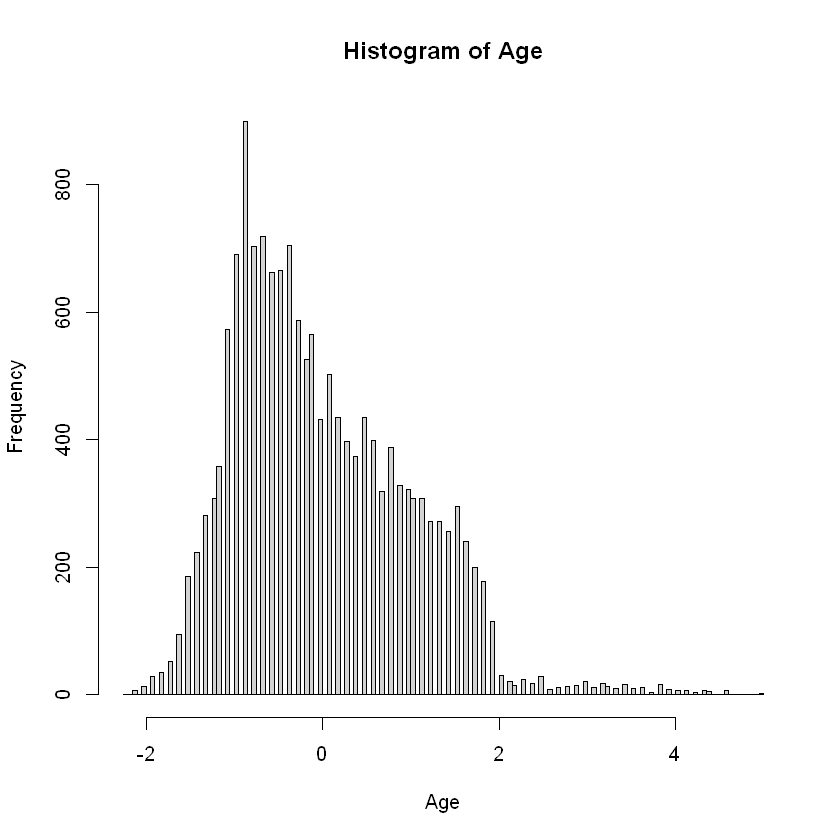

In [22]:
####OUTLIER TREATMENT####

#GET SUMMARY OF COLUMN
summary(train$euribor3m)

# PLOT HISTOGRAM
hist(train$age,
     xlab = "Age",
     main = "Histogram of Age",
     breaks = sqrt(nrow(train))
) 

In [24]:
#WHAT ROWS ARE OUTLIERS?
out <- boxplot.stats(train$age)$out
out_ind <- which(train$age %in% c(out))
out_ind

[1]   110   183   318   379   445   587   613   775   793  1269  1297  1397
 [13]  1473  1514  1707  1752  1783  1907  1954  2112  2180  2200  2294  2295
 [25]  2334  2386  2405  2449  2537  2543  2652  2820  3099  3186  3365  3371
 [37]  3456  3499  3609  3665  3731  3821  3913  3915  4076  4212  4289  4309
 [49]  4314  4318  4337  4483  4560  4724  4783  4850  4890  4929  4930  4990
 [61]  5120  5268  5420  5551  5581  5670  5692  5741  5908  5950  6012  6015
 [73]  6142  6477  6591  6671  6778  6900  6960  7058  7222  7406  7533  7563
 [85]  7617  7622  8096  8151  8298  8457  8473  8577  8769  8794  8990  9017
 [97]  9131  9149  9228  9307  9316  9322  9329  9419  9445  9561  9601  9611
[109]  9648  9677  9745  9791  9805  9957  9965  9977 10015 10189 10383 10478
[121] 10583 10683 10815 10974 11037 11041 11198 11319 11382 11455 11550 11577
[133] 11674 11756 11811 11860 11894 11962 11991 12207 12222 12282 12368 12375
[145] 12376 12530 12532 12686 12746 12923 13015 13127 13221 13299 13312 13328
[157] 13425 13453 13522 13550 13653 13689 13722 13743 13749 13764 13919 13952
[169] 14060 14226 14259 14261 14289 14388 14399 14648 14739 14876 14925 15058
[181] 15115 15237 15361 15528 15529 15530 15778 15909 15921

In [25]:
#TREAT OUTLIERS https://www.r-bloggers.com/2020/01/how-to-remove-outliers-in-r/
#TREAT AGE VARIABLE

Q <- quantile(train$age, probs=c(.25, .75), na.rm = FALSE)
iqr <- IQR(train$age)

top <-  Q[2]+1.5*iqr # Upper Range  
low<- Q[1]-1.5*iqr # Lower Range

filtered<- subset(train, train$age > (Q[1] - 1.5*iqr) & train$age < (Q[2]+1.5*iqr))


In [26]:
#TREAT CONS CONF VARIABLE

Q <- quantile(train$cons.conf.idx, probs=c(.25, .75), na.rm = FALSE)
iqr <- IQR(train$cons.conf.idx)

top <-  Q[2]+1.5*iqr # Upper Range  
low<- Q[1]-1.5*iqr # Lower Range

In [27]:
#CREATE FINAL BASE TABLE FOR TRAIN
bank_final<- subset(filtered, filtered$cons.conf.idx > (Q[1] - 1.5*iqr) & filtered$cons.conf.idx < (Q[2]+1.5*iqr))
bank_final <- data.frame(bank_final)

In [28]:
#drop columns not needed in train

bank_final$pdays <- NULL
bank_final$client_id <- NULL

train$pdays <- NULL
train$client_id <-NULL

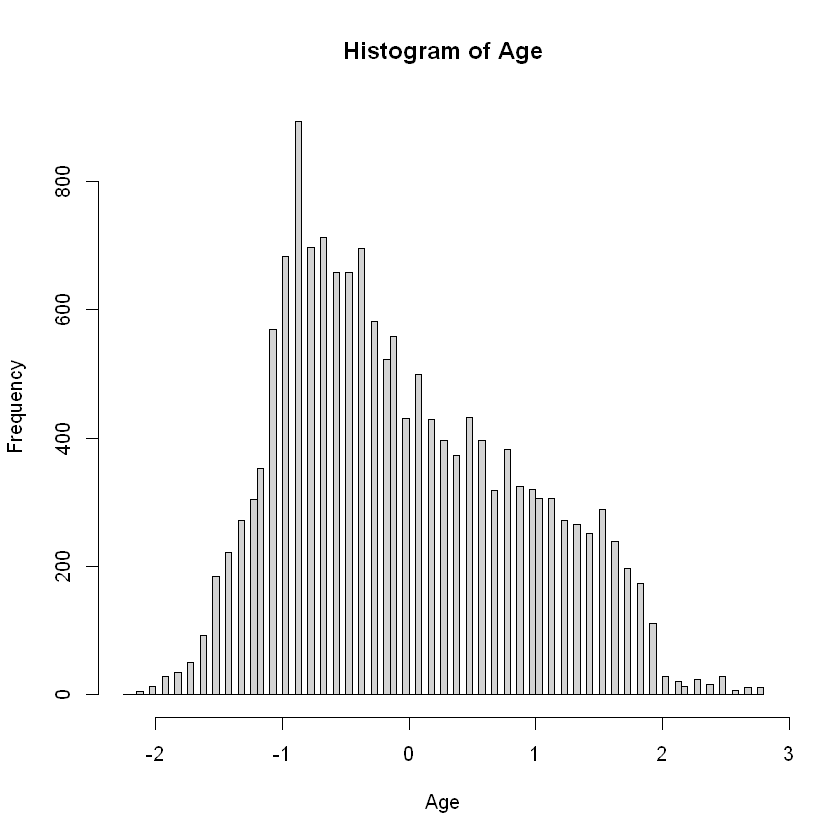

In [29]:
#HISTOGRAM OF AGE AFTER OUTLIER TREATMENT
hist(bank_final$age,
     xlab = "Age",
     main = "Histogram of Age",
     breaks = sqrt(nrow(bank_final))
) 

# DATA PRE-PROCESSING TEST

In [31]:
#CHECK FOR NA'S
sapply(test, function(x) sum(is.na(x)))
unique(test$marital)

client_id            age            job        marital      education 
             0             48             34             31             39 
       default        housing           loan        contact          month 
            49             41             47             47             40 
   day_of_week       campaign          pdays       previous       poutcome 
            42             43             43             38             33 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
            31             41             36             40             36 
     subscribe 
             0

[1] "single"   "divorced" "married"  NA         "unknown"

In [32]:
#REPLACE NA'S OF CATEGORICAL VARIABLES BY THE MODE OF THE COLUMN
test$job[is.na(test$job)] <- getmode(test$job)  

test$marital[is.na(test$marital)] <- getmode(test$marital) 

test$education[is.na(test$education)] <- getmode(test$education) 

test$default[is.na(test$default)] <- getmode(test$default) 

test$housing[is.na(test$housing)] <- getmode(test$housing)  

test$loan[is.na(test$loan)] <- getmode(test$loan)

test$contact[is.na(test$contact)] <- getmode(test$contact)  

test$month[is.na(test$month)] <- getmode(test$month)  

test$day_of_week[is.na(test$day_of_week)] <- getmode(test$day_of_week) 

test$poutcome[is.na(test$poutcome)] <- getmode(test$poutcome)  

test$age[is.na(test$age)] <- getmode(test$age)

test$campaign[is.na(test$campaign)] <- getmode(test$campaign)  

test$pdays[is.na(test$pdays)] <- getmode(test$pdays)  

test$previous[is.na(test$previous)] <- getmode(test$previous)  

test$emp.var.rate[is.na(test$emp.var.rate)] <- mean(test$emp.var.rate,na.rm=TRUE)

test$cons.price.idx[is.na(test$cons.price.idx)] <- getmode(test$cons.price.idx)

test$cons.conf.idx[is.na(test$cons.conf.idx)] <- mean(test$cons.conf.idx,na.rm=TRUE)

test$euribor3m[is.na(test$euribor3m)] <- mean(test$euribor3m,na.rm=TRUE)  

test$nr.employed[is.na(test$nr.employed)] <- mean(test$nr.employed, na.rm=TRUE)

In [33]:
#CHECK FOR NA's TO SEE IF IT WORKED
sapply(test, function(x) sum(is.na(x)))

client_id            age            job        marital      education 
             0              0              0              0              0 
       default        housing           loan        contact          month 
             0              0              0              0              0 
   day_of_week       campaign          pdays       previous       poutcome 
             0              0              0              0              0 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
             0              0              0              0              0 
     subscribe 
             0

In [34]:
#ENCODE CATEGORICAL VARIABLES BY REPLACING THEM FOR NUMBERS WITH IFELSE 


test$job <- ifelse(test$job == 'management',1, ifelse(test$job ==  'unemployed',2, ifelse(test$job =='technician',3,ifelse(test$job =='services',4, ifelse(test$job =='unknown',5, ifelse(test$job =='blue-collar',6, ifelse(test$job =='admin.',7, ifelse(test$job =='entrepreneur',8, ifelse(test$job =='retired',9, ifelse(test$job =='housemaid',10,ifelse(test$job =='student',11, ifelse(test$job =='self-employed',12,test$job))))))))))))

unique(test$marital)
unique(test$education)


test$marital <- ifelse(test$marital == 'married',1, ifelse(test$marital ==  'single',2, ifelse(test$marital =='divorced',3, ifelse(test$job =='unknown',4,test$job))))

unique(test$education)

test$education <- ifelse(test$education == 'basic.9y',1, ifelse(test$education == 'university.degree',2, ifelse(test$education =='high.school',3,ifelse(test$education =='unknown',4, ifelse(test$education =='professional.course',5,ifelse(test$education == 'basic.6y',6, ifelse(test$education ==  'basic.4y',7,ifelse(test$education =='illiterate',8,test$education))))))))


unique(test$default)

test$default <- ifelse(test$default == 'no',1, ifelse(test$default == 'unknown',2,ifelse(test$default =='yes',3,test$default)))


unique(test$housing)

test$housing <- ifelse(test$housing == 'no',1, ifelse(test$housing == 'unknown',2,ifelse(test$housing =='yes',3,test$housing)))

unique(test$loan)

test$loan <- ifelse(test$loan == 'no',1, ifelse(test$loan == 'unknown',2,ifelse(test$loan =='yes',3,test$loan)))

unique(test$contact)
test$contact <- ifelse(test$contact == 'cellular',1, ifelse(test$contact == 'telephone',2,test$contact))

unique(test$month)

test$month <- ifelse(test$month == 'jul',7, ifelse(test$month == 'jun',6, ifelse(test$month =='may',5,ifelse(test$month =='apr',4, ifelse(test$month =='aug',8,ifelse(test$month == 'nov',11, ifelse(test$month ==  'sep',9,ifelse(test$month =='oct',10,ifelse(test$month == 'dec',12, ifelse(test$month == 'mar',3,test$month))))))))))

unique(test$day_of_week)

test$day_of_week <- ifelse(test$day_of_week == 'thu',4, ifelse(test$day_of_week == 'mon',1, ifelse(test$day_of_week =='tue',2,ifelse(test$day_of_week =='wed',3, ifelse(test$day_of_week =='fri',5,test$day_of_week)))))
unique(test$contact)

test$poutcome <- ifelse(test$poutcome == 'nonexistent',1, ifelse(test$poutcome == 'failure',2, ifelse(test$poutcome =='success',3,test$poutcome)))


[1] "single"   "divorced" "married"  "unknown"

[1] "university.degree"   "basic.4y"            "high.school"        
[4] "professional.course" "unknown"             "basic.9y"           
[7] "basic.6y"            "illiterate"

[1] "university.degree"   "basic.4y"            "high.school"        
[4] "professional.course" "unknown"             "basic.9y"           
[7] "basic.6y"            "illiterate"

[1] "no"      "unknown"

[1] "no"      "yes"     "unknown"

[1] "no"      "yes"     "unknown"

[1] "cellular"  "telephone"

[1] "apr" "oct" "jul" "aug" "may" "sep" "nov" "jun" "mar" "dec"

[1] "tue" "mon" "fri" "wed" "thu"

[1] "1" "2"

In [35]:
#CREATE DUMMY VARIABLE FOR PDAYS TO SEE IF CLIENTS WERE CONTACTED OR NOT
install.packages(c("fastDummies", "recipes"))
test$contacted_or_not <- ifelse(test$pdays == '999', 0, 1)

#variables as factors
test$job <- as.factor(test$job)
test$marital <-as.numeric(test$marital)
test$education <-as.factor(test$education)
test$default <-as.factor(test$default)
test$housing <-as.factor(test$housing)
test$loan <-as.factor(test$loan)
test$contact <-as.factor(test$contact)
test$month <-as.factor(test$month)
test$day_of_week <-as.factor(test$day_of_week)
test$pdays <-as.numeric(test$pdays)
test$poutcome <-as.factor(test$poutcome)
test$subscribe <-as.factor(test$subscribe)
test$age <-as.numeric(test$age)
test$contacted_or_not <-as.factor(test$contacted_or_not)

package 'fastDummies' successfully unpacked and MD5 sums checked
package 'recipes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mmarcosiglesias\AppData\Local\Temp\Rtmp8E7Os4\downloaded_packages


       V1         
 Min.   :-1.7216  
 1st Qu.:-1.3125  
 Median : 0.7147  
 Mean   : 0.0000  
 3rd Qu.: 0.7747  
 Max.   : 0.8231  

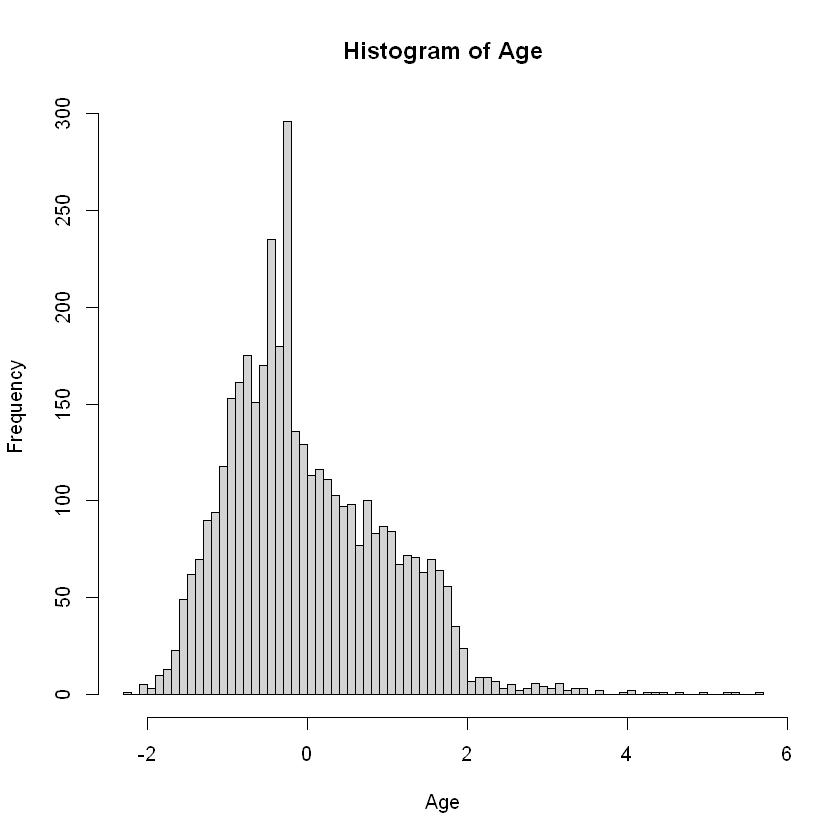

In [36]:
###OUTLIER TREATMENT###

#GET SUMMARY OF COLUMN
summary(test$euribor3m)

#HISTOGRAM
hist(test$age,
     xlab = "Age",
     main = "Histogram of Age",
     breaks = sqrt(nrow(test))
) 

In [38]:
#WHAT ROWS ARE OUTLIERS?
out <- boxplot.stats(test$age)$out
out_ind <- which(test$age %in% c(out))
out_ind

[1]   10   64  115  224  305  535  788  984 1166 1323 1369 1429 1550 1559 1738
[16] 2015 2031 2070 2240 2378 2429 2470 2551 2600 2834 2945 2957 2969 3235 3366
[31] 3474 3511 3540 3614

In [39]:
#TREAT OUTLIERS https://www.r-bloggers.com/2020/01/how-to-remove-outliers-in-r/
#TREAT AGE VARIABLE

Q <- quantile(test$age, probs=c(.25, .75), na.rm = FALSE)
iqr <- IQR(test$age)

top <-  Q[2]+1.5*iqr # Upper Range  
low<- Q[1]-1.5*iqr # Lower Range

filtered_test<- subset(test, test$age > (Q[1] - 1.5*iqr) & test$age < (Q[2]+1.5*iqr))

In [40]:
#TREAT CONS CONF VARIABLE

Q <- quantile(test$cons.conf.idx, probs=c(.25, .75), na.rm = FALSE)
iqr <- IQR(test$cons.conf.idx)

top <-  Q[2]+1.5*iqr # Upper Range  
low<- Q[1]-1.5*iqr # Lower Range

In [41]:
#CREATE FINAL BASE TABLE FOR TEST
bank_final_test<- subset(filtered_test, filtered_test$cons.conf.idx > (Q[1] - 1.5*iqr) & filtered_test$cons.conf.idx < (Q[2]+1.5*iqr))
bank_final_test <- data.frame(bank_final_test)

In [42]:
#drop columns not needed in test

bank_final_test$pdays <- NULL
bank_final_test$client_id <- NULL

test$pdays <- NULL
test$client_id <-NULL

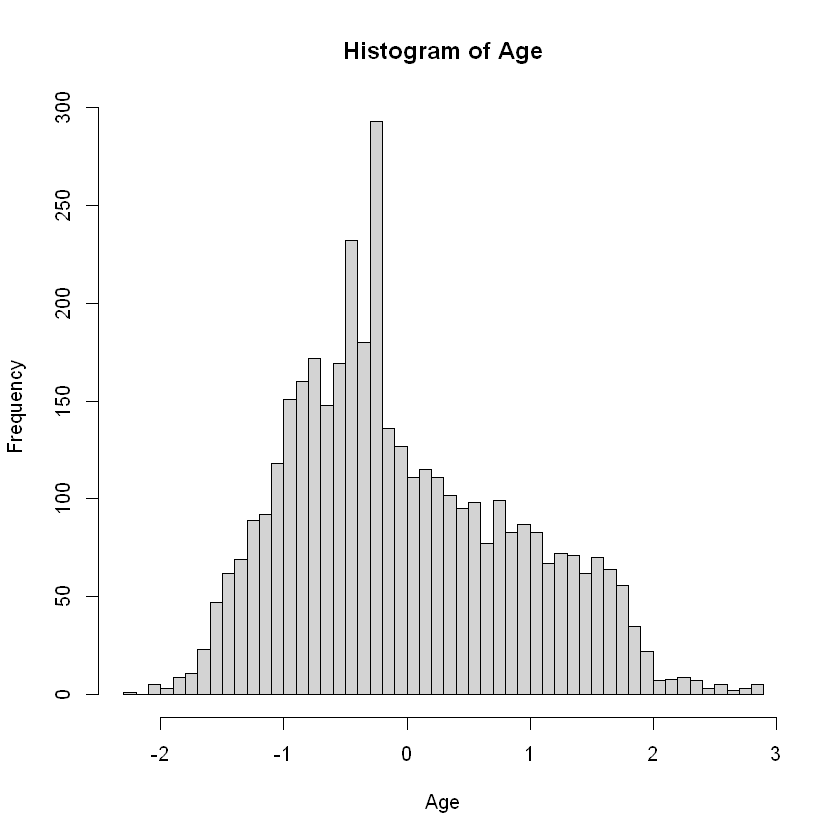

In [43]:
#HISTOGRAM OF AGE AFTER OUTLIER TREATMENT
hist(bank_final_test$age,
     xlab = "Age",
     main = "Histogram of Age",
     breaks = sqrt(nrow(bank_final_test))
) 

# LOGISTIC REGRESSION

In [49]:
#INSTALL NEEDED PACKAGES
install.packages("ggplot2")
install.packages("dplyr")
install.packages("broom")
install.packages("ggpubr")
install.packages("dplyr")
library(dplyr)

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mmarcosiglesias\AppData\Local\Temp\Rtmp8E7Os4\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\tools\Anaconda3\envs\r-env\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll to C:\tools\Anaconda3\envs\r-env\Lib\R\library\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\mmarcosiglesias\AppData\Local\Temp\Rtmp8E7Os4\downloaded_packages
package 'broom' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mmarcosiglesias\AppData\Local\Temp\Rtmp8E7Os4\downloaded_packages
package 'ggpubr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mmarcosiglesias\AppData\Local\Temp\Rtmp8E7Os4\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\tools\Anaconda3\envs\r-env\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll to C:\tools\Anaconda3\envs\r-env\Lib\R\library\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\mmarcosiglesias\AppData\Local\Temp\Rtmp8E7Os4\downloaded_packages



Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following object is masked from 'package:randomForest':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [45]:
# Fit the model
bank_lr <- glm(subscribe ~., data = train, family = binomial)

# Summarize the model
summary(bank_lr)


Call:
glm(formula = subscribe ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1619  -0.4104  -0.3317  -0.2668   2.8989  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.487119   0.405588  -3.667 0.000246 ***
age                 0.042836   0.032287   1.327 0.184599    
job10               0.008094   0.211948   0.038 0.969537    
job11               0.182285   0.196426   0.928 0.353403    
job12              -0.261958   0.191352  -1.369 0.171004    
job2                0.014223   0.200003   0.071 0.943307    
job3               -0.089516   0.134211  -0.667 0.504788    
job4               -0.148301   0.152915  -0.970 0.332133    
job5                0.031744   0.338672   0.094 0.925323    
job6               -0.171098   0.140306  -1.219 0.222669    
job7                0.002319   0.117400   0.020 0.984240    
job8               -0.077165   0.189549  -0.407 0.683937    
job9     

In [46]:
#STEPWISE/ DIMENSIONALITY REDUCTION/FEATURE SELECTION
stepAIC(bank_lr)


Start:  AIC=9108.41
subscribe ~ age + job + marital + education + default + housing + 
    loan + contact + month + day_of_week + campaign + previous + 
    poutcome + emp.var.rate + cons.price.idx + cons.conf.idx + 
    euribor3m + nr.employed + contacted_or_not

                   Df Deviance    AIC
- job              11   9018.5 9098.5
- education         7   9011.0 9099.0
- loan              2   9007.1 9105.1
- previous          1   9006.5 9106.5
- housing           2   9008.5 9106.5
- marital           1   9006.6 9106.6
- euribor3m         1   9007.2 9107.2
- age               1   9008.2 9108.2
<none>                  9006.4 9108.4
- nr.employed       1   9011.4 9111.4
- cons.price.idx    1   9013.0 9113.0
- campaign          1   9013.3 9113.3
- cons.conf.idx     1   9013.6 9113.6
- default           2   9015.8 9113.8
- emp.var.rate      1   9013.9 9113.9
- day_of_week       4   9023.4 9117.4
- poutcome          2   9022.7 9120.7
- contacted_or_not  1   9022.3 9122.3
- contact    


Call:  glm(formula = subscribe ~ age + default + contact + month + day_of_week + 
    campaign + poutcome + emp.var.rate + cons.price.idx + cons.conf.idx + 
    nr.employed + contacted_or_not, family = binomial, data = train)

Coefficients:
      (Intercept)                age           default2           default3  
         -1.55474            0.05293           -0.31424           -8.69726  
         contact2            month11            month12             month3  
         -0.39241           -0.12992            0.31236            0.99956  
           month4             month5             month6             month7  
          0.04319           -0.48655            0.14109            0.35625  
           month8             month9       day_of_week2       day_of_week3  
          0.08129           -0.19809            0.28555            0.34357  
     day_of_week4       day_of_week5           campaign          poutcome2  
          0.23839            0.27029           -0.09235          

In [50]:
# Fit the model again with optimal features
bank_lr_1 <- glm(subscribe ~ age + default + contact + month + day_of_week + 
    campaign + poutcome + emp.var.rate + cons.price.idx + cons.conf.idx + 
    nr.employed + contacted_or_not, family = binomial, data = train)

In [51]:
# Make predictions of test
prob <- bank_lr_1 %>% predict(test, type = "response")
pred <- ifelse(prob > 0.5, 1, 0)

# Model accuracy
mean(pred == test$subscribe)

[1] 0.89775

In [52]:
# Make predictions of train
prob_t <- bank_lr %>% predict(train, type = "response")
predict_1 <- ifelse(prob_t > 0.5, 1, 0)

# Model accuracy
mean(predict_1 == train$subscribe)

#compare results to identify if the model is overfitting

[1] 0.9013125

In [53]:
library(mlr)


In [54]:
#CONFUSION MATRIX
table(test$subscribe,pred)

   pred
       0    1
  0 3489   38
  1  371  102

In [55]:
#CROSS VALIDATION

# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_logreg <- makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=F)

# Define the model
task_logreg <- makeClassifTask(data=train, target="subscribe")

Resampling: cross-validation

Measures:             auc       

Functional features have been converted to numerics

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 1:    0.7676034 

Functional features have been converted to numerics

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 2:    0.7767926 

Functional features have been converted to numerics

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 3:    0.7442388 

Functional features have been converted to numerics

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 4:    0.7640275 

Functional features have been converted to numerics

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resa

Resample Result
Task: train
Learner: classif.logreg
Aggr perf: auc.test.mean=0.7728913
Runtime: 4.73627

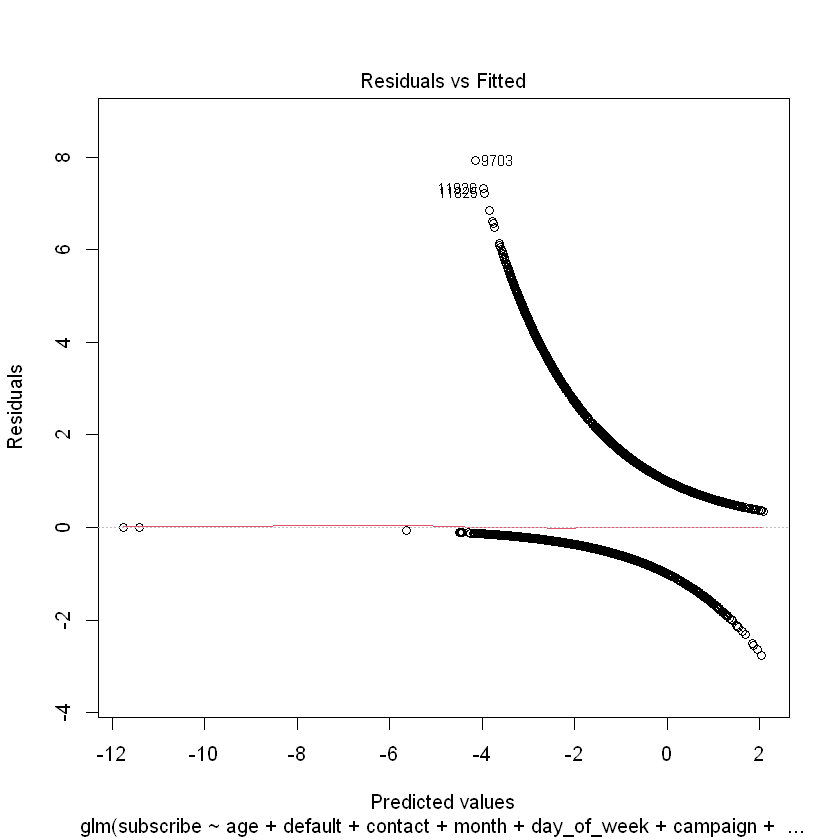

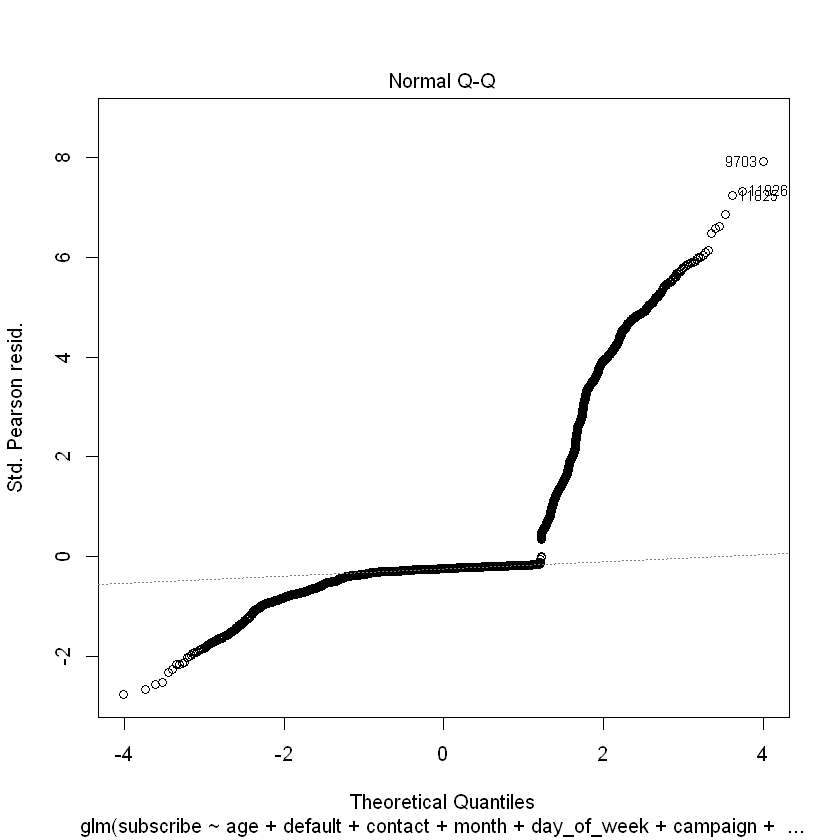

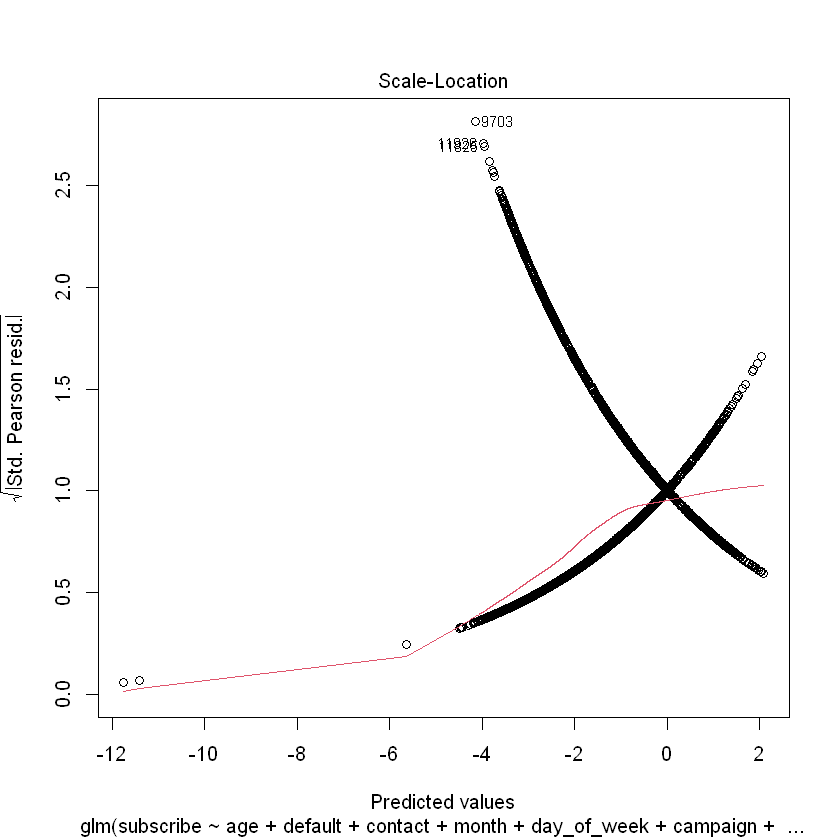

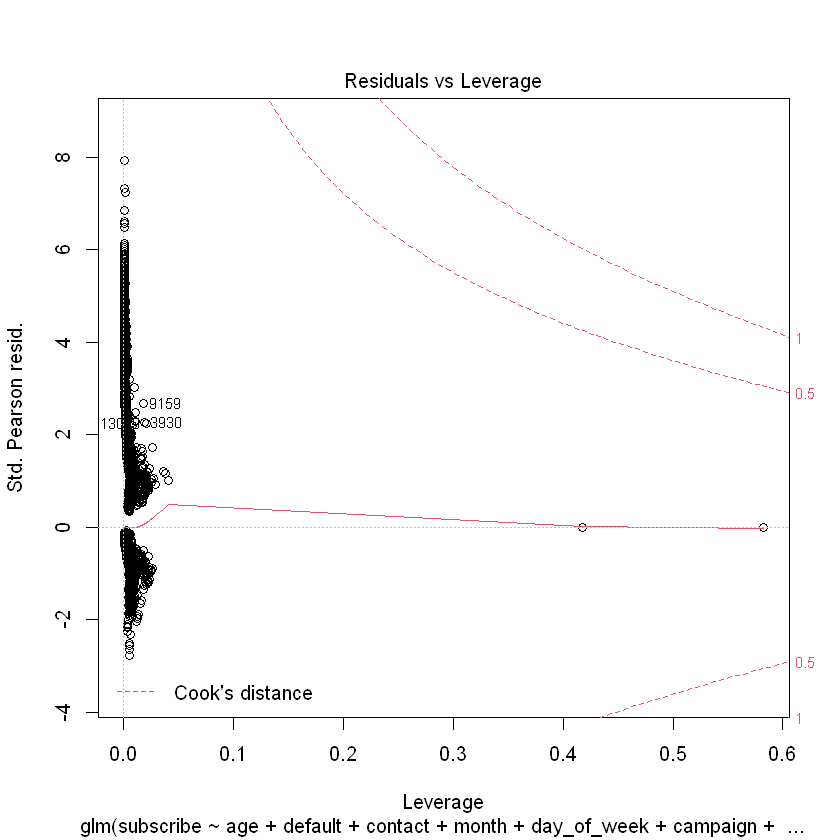

In [56]:
# Run the k-fold CV
mlr::resample(lnr_logreg, task_logreg, rdesc, measures = list(mlr::auc))
plot(bank_lr_1)

# LINEAR DISCRIMINANT ANALYSIS (LDA)

In [57]:
library(ggplot2)
library(MASS)


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin




In [58]:
# Fit LDA model
md_lda <- lda(subscribe ~ ., data=train)
md_lda

Call:
lda(subscribe ~ ., data = train)

Prior probabilities of groups:
       0        1 
0.887625 0.112375 

Group means:
          age      job10      job11      job12       job2      job3       job4
0 -0.02479171 0.02647514 0.01563160 0.03569920 0.02267286 0.1646951 0.09801436
1  0.12167635 0.02725250 0.04783092 0.02780868 0.03170189 0.1512792 0.07007786
         job5      job6      job7       job8       job9  marital education2
0 0.006830024 0.2361639 0.2516547 0.03731869 0.03520631 1.507605  0.2962259
1 0.008898776 0.1401557 0.2981090 0.02725250 0.09454950 1.575640  0.3587319
  education3 education4 education5 education6 education7   education8
0  0.2281369 0.03633291  0.1244895 0.05555556 0.10463315 0.0004928883
1  0.2313682 0.04838710  0.1223582 0.03893215 0.09399333 0.0000000000
    default2     default3   housing2  housing3      loan2     loan3  contact2
0 0.22025067 0.0001408252 0.02351781 0.5287988 0.02358823 0.1490635 0.3879031
1 0.09955506 0.0000000000 0.02391546 0.5339266

In [59]:
# Make some prediction
lda_pred <- predict(md_lda)
head(lda_pred$posterior)

,0,1
10801,0.9631973,0.03680271
12261,0.8943292,0.10567081
2369,0.9741915,0.02580854
5273,0.9818989,0.01810110
9290,0.9789505,0.02104953
1252,0.9745251,0.02547491


In [60]:
library(lattice)
library(ggplot2)
library(caret)
install.packages('klaR')
library(klaR)


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train




package 'klaR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mmarcosiglesias\AppData\Local\Temp\Rtmp8E7Os4\downloaded_packages


In [61]:
#STEPWISE/FEATURE SELECTION
maxvar <- (4)
direction <- "backward"
tune=data.frame(maxvar,direction)


stepwise_lda <-train(subscribe ~ ., data = train,
                     method = "stepLDA",
                     trControl = trainControl(method = "none"),tuneGrid=tune)

 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.

16000 observations of 50 variables in 2 classes; direction: backward

stop criterion: assemble 4 best variables.



correctness rate: 0.88862;  starting variables (50): age, job10, job11, job12, job2, job3, job4, job5, job6, job7, job8, job9, marital, education2, education3, education4, education5, education6, education7, education8, default2, default3, housing2, housing3, loan2, loan3, contact2, month11, month12, month3, month4, month5, month6, month7, month8, month9, day_of_week2, day_of_week3, day_of_week4, day_of_week5, campaign, previous, poutcome2, poutcome3, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, contacted_or_not1 
correctness rate: 0.89062;  out: "month5";  variables (49): age, job10, job11, job12, job2, job3, job4, job5, job6, job7, job8, job9, marital, education2, education3, education4, education5, education6, education7, education8, default2, default3, housing2, housing3, loan2, loan3, contact2, month11, month12, month3, month4, month6, month7, month8, month9, day_of_week2, day_of_week3, day_of_week4, day_of_week5, campaign, previous, poutcome2, poutcome3, e

In [62]:
# Fit the model with optimal features
md_lda_1<- glm(formula = subscribe ~ age + job + education+ housing+ loan +contact +month + day_of_week +default +poutcome + emp.var.rate + cons.price.idx + 
                 cons.conf.idx + nr.employed+previous+ emp.var.rate+ contacted_or_not +euribor3m, family = binomial, data = train)

# Summarize the model
summary(md_lda_1)




Call:
glm(formula = subscribe ~ age + job + education + housing + loan + 
    contact + month + day_of_week + default + poutcome + emp.var.rate + 
    cons.price.idx + cons.conf.idx + nr.employed + previous + 
    emp.var.rate + contacted_or_not + euribor3m, family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1497  -0.4088  -0.3324  -0.2680   2.8584  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.429364   0.402737  -3.549 0.000387 ***
age                 0.041353   0.032179   1.285 0.198771    
job10               0.009139   0.211637   0.043 0.965558    
job11               0.191879   0.195444   0.982 0.326219    
job12              -0.262508   0.191178  -1.373 0.169719    
job2                0.010729   0.199867   0.054 0.957190    
job3               -0.087456   0.133970  -0.653 0.513885    
job4               -0.148447   0.152790  -0.972 0.331265    
job5                0.04

In [63]:
# Make predictions on test
prob_te <- md_lda_1 %>% predict(test, type = "response")
predict_11 <- ifelse(prob_te > 0.5, 1, 0)

# Model accuracy
mean(predict_11 == test$subscribe)

[1] 0.89825

In [64]:
# Make predictions on train
prob_tr <- md_lda_1 %>% predict(train, type = "response")
predict_1_ <- ifelse(prob_tr > 0.5, 1, 0)

# Model accuracy
mean(predict_1_ == train$subscribe)

[1] 0.9006875

Resampling: cross-validation

Measures:             auc       

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 1:    0.7667240 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 2:    0.7734878 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 3:    0.7460287 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 4:    0.7344034 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 5:    0.7628485 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 6:    0.7870488 

Functional features have been converted to numerics

Functional features have been converted to 

Resample Result
Task: train_knn_l
Learner: classif.lda
Aggr perf: auc.test.mean=0.7570900
Runtime: 1.9418

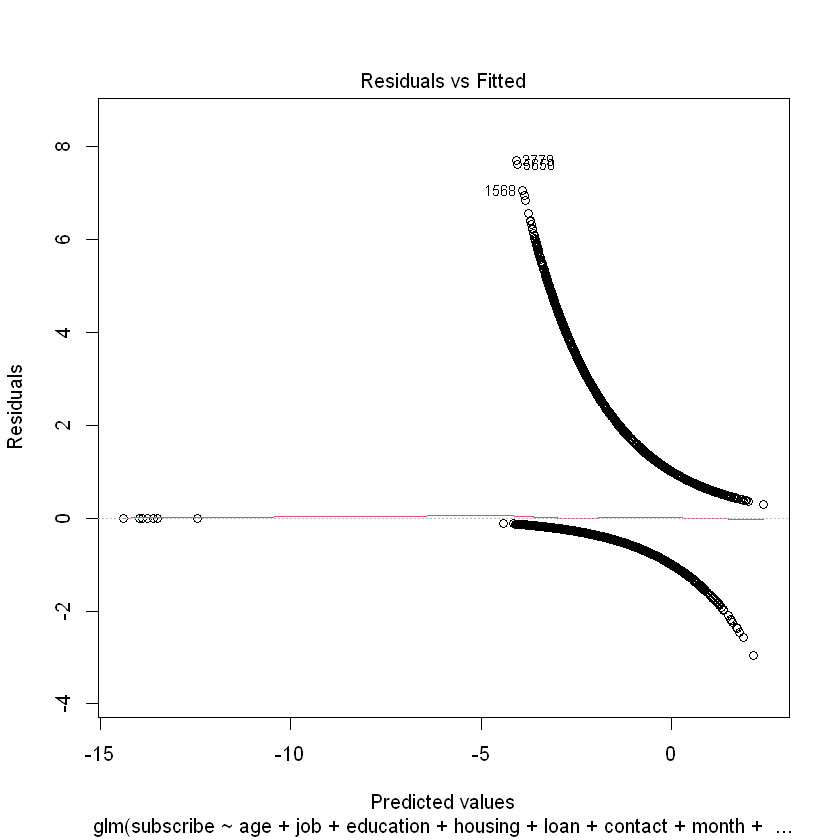

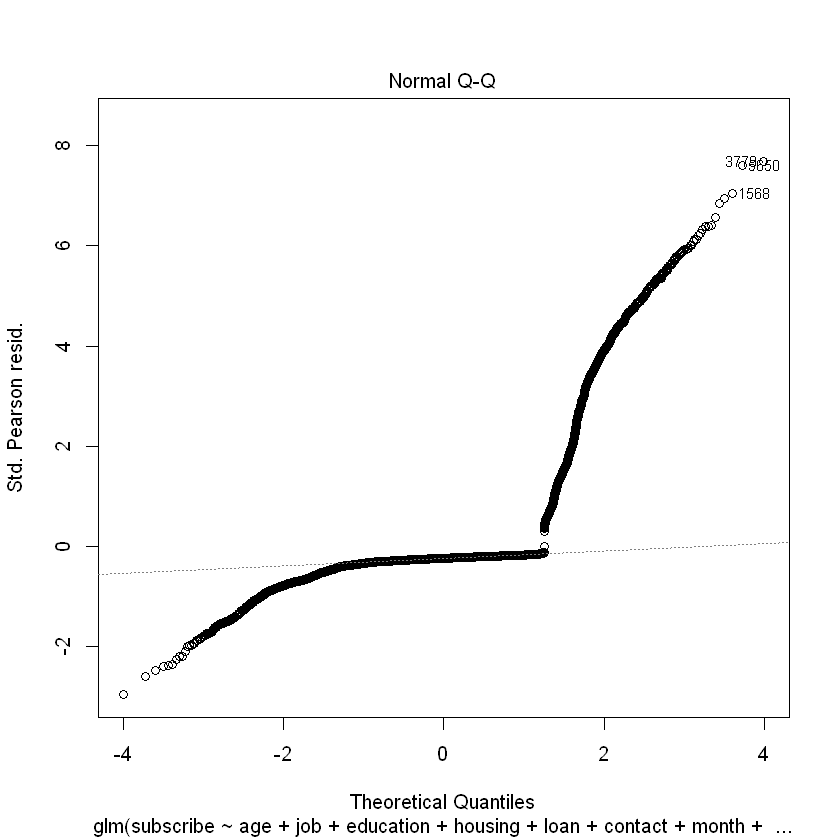

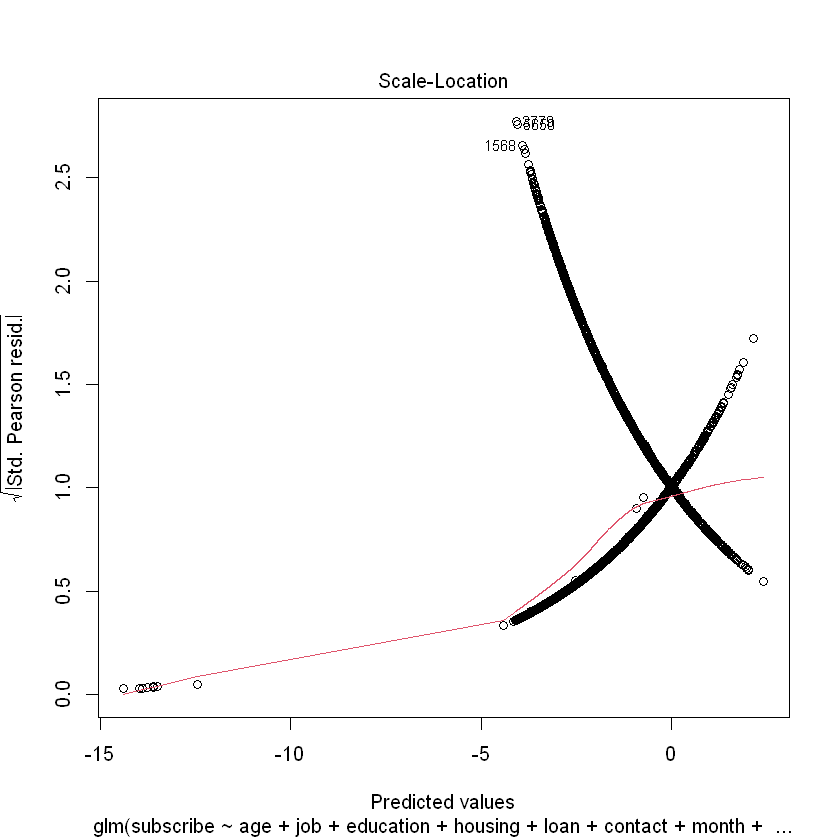

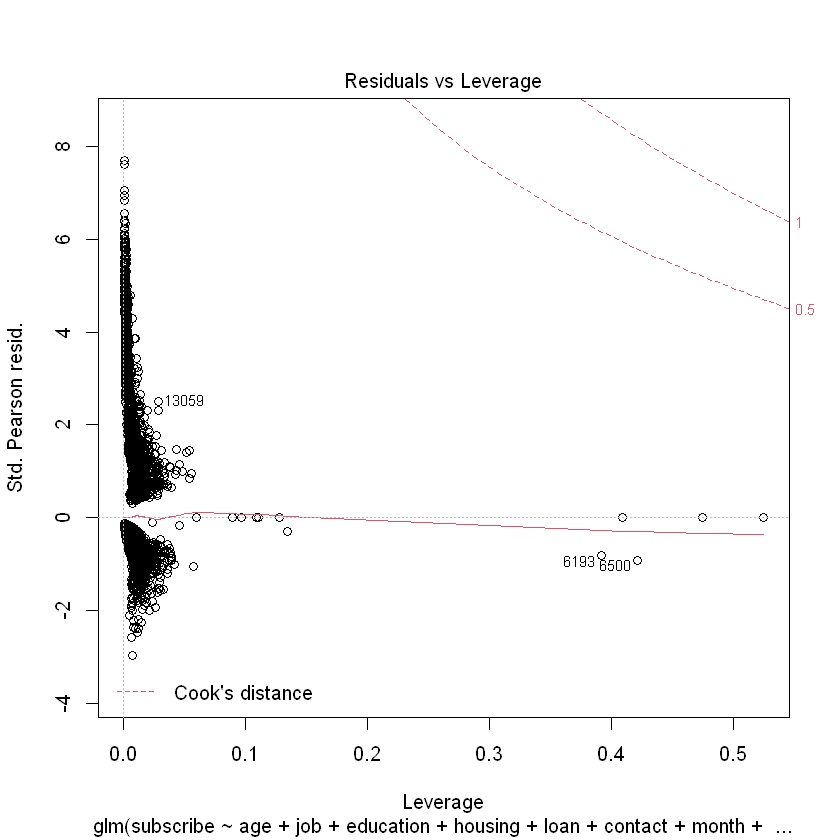

In [126]:
#CROSS VALIDATION
# Set up cross-validation
rdesc_lda = makeResampleDesc("CV", iters=10)

# Define the model
lnr_lda <- makeLearner("classif.lda", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_lda <- makeClassifTask(data=train, target="subscribe")

# Run the k-fold CV
mlr::resample(lnr_lda, task_lda, rdesc, measures=list(mlr::auc))
plot(md_lda_1)


# K- Nearest Neighbors

In [65]:
#LOAD AND INSTALL SOME PACKAGES
install.packages('FastKNN')
library(FastKNN)
library("readr")    
library("dplyr")   

package 'FastKNN' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mmarcosiglesias\AppData\Local\Temp\Rtmp8E7Os4\downloaded_packages


In [66]:
# Fit the KNN model using k=5 first
library(class)

# k = 5
set.seed(123)
md_knn <- knn(train=train,
                 test=test,
                 cl=train$subscribe,
                 k=5)

#Get summary of model
summary(md_knn)

0    1 
3751  249

In [67]:
#Get optimal k for the model (feature scaling) and cross validate in the same step
#source: https://rpubs.com/njvijay/16444
cont <- trainControl(method="repeatedcv",repeats = 4)
fit_knn <- train(subscribe ~ ., data = train, method = "knn", trControl = cont, preProcess = c("center","scale"), tuneLength = 20)
fit_knn

k-Nearest Neighbors 

16000 samples
   19 predictor
    2 classes: '0', '1' 

Pre-processing: centered (50), scaled (50) 
Resampling: Cross-Validated (10 fold, repeated 4 times) 
Summary of sample sizes: 14400, 14400, 14400, 14400, 14400, 14400, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.8896561  0.2658522
   7  0.8931092  0.2705030
   9  0.8942187  0.2685113
  11  0.8947187  0.2636892
  13  0.8950624  0.2588816
  15  0.8955000  0.2531734
  17  0.8964062  0.2553837
  19  0.8969374  0.2560789
  21  0.8966874  0.2533028
  23  0.8973436  0.2563726
  25  0.8971561  0.2536191
  27  0.8977186  0.2579854
  29  0.8977031  0.2542286
  31  0.8976405  0.2534403
  33  0.8978436  0.2539857
  35  0.8977498  0.2537437
  37  0.8975624  0.2517116
  39  0.8977812  0.2532263
  41  0.8974218  0.2505038
  43  0.8975624  0.2510471

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 33.

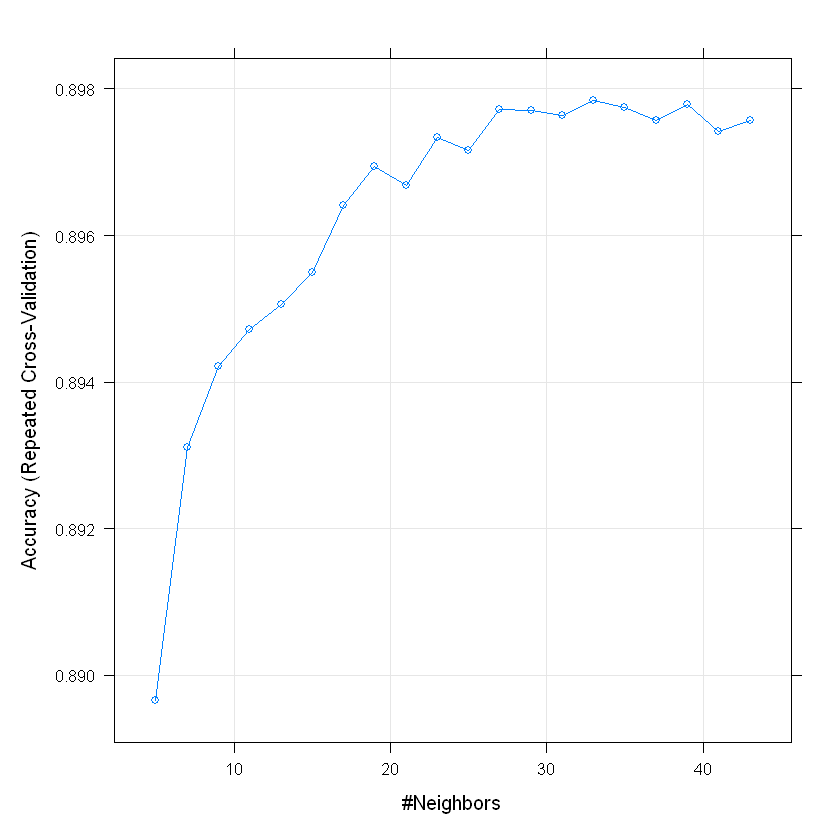

In [68]:
#PLOT THE MODEL TO VISUALIZE OPTIMAL K
plot(fit_knn)

In [97]:
#Re-run the model with optimal suggested number of k
set.seed(123)
predi_knn <- knn(train=train, test=test, cl=train$subscribe, k=33, prob=TRUE)


In [98]:
#confusion matrix
table(predi_knn,test$subscribe)

         
predi_knn    0    1
        0 3490  364
        1   37  109

In [99]:
# Model accuracy
mean(predi_knn == test$subscribe)

[1] 0.89975

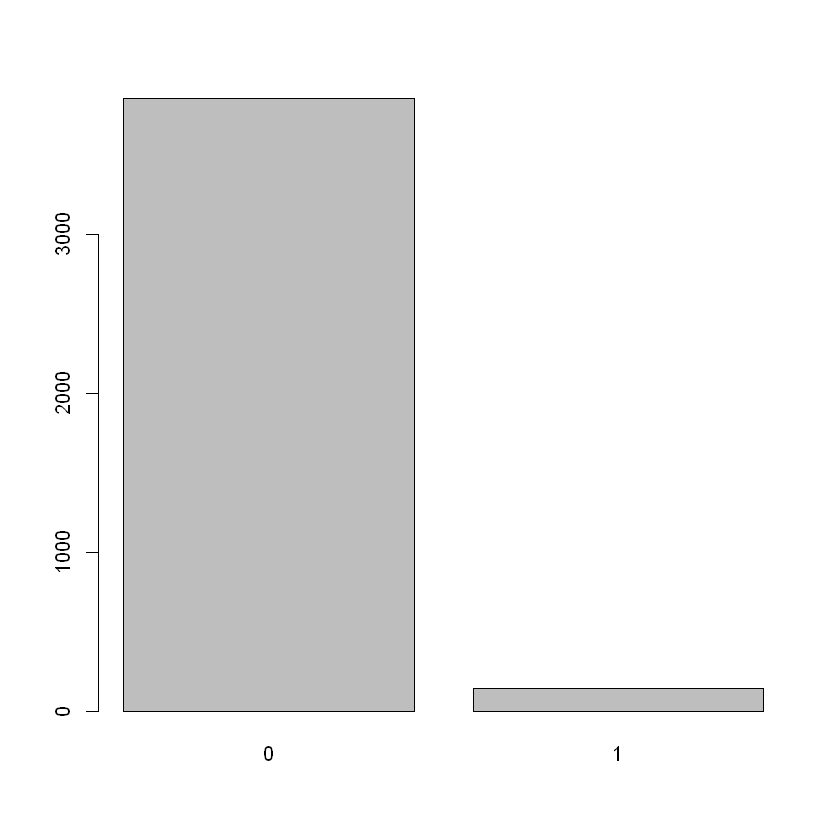

In [100]:
#plot the model
plot(predi_knn)

[1] 0.7272727 0.8181818 0.5454545 1.0000000 0.9393939 0.7575758 0.9696970
   [8] 0.7272727 1.0000000 0.6969697 1.0000000 0.9696970 1.0000000 1.0000000
  [15] 0.9705882 0.9090909 0.9696970 0.9705882 1.0000000 1.0000000 0.7878788
  [22] 0.6666667 0.9696970 1.0000000 0.9411765 1.0000000 0.7878788 0.9393939
  [29] 0.9696970 0.9393939 1.0000000 0.5151515 0.9393939 0.9714286 1.0000000
  [36] 0.9696970 0.9411765 0.6666667 1.0000000 0.9705882 1.0000000 0.5151515
  [43] 0.7878788 0.8235294 0.5151515 0.9428571 0.9393939 1.0000000 0.9696970
  [50] 1.0000000 1.0000000 1.0000000 0.9393939 0.6969697 1.0000000 0.8787879
  [57] 0.9696970 0.9696970 0.6666667 0.9696970 0.9696970 1.0000000 0.9705882
  [64] 0.6969697 1.0000000 0.9696970 0.8787879 0.9090909 1.0000000 0.9393939
  [71] 1.0000000 1.0000000 1.0000000 0.6666667 0.6969697 0.6060606 0.9393939
  [78] 0.8181818 0.9696970 0.9696970 1.0000000 0.9696970 1.0000000 0.5757576
  [85] 0.9696970 0.9393939 0.9393939 1.0000000 0.5151515 1.0000000 0.9393939
  [92] 0.9696970 0.9090909 1.0000000 1.0000000 1.0000000 1.0000000 0.9090909
  [99] 1.0000000 0.6060606 0.9090909 0.8181818 0.6666667 0.9696970 0.9696970
 [106] 0.6060606 0.9705882 0.9696970 0.9696970 0.9393939 0.6969697 0.9393939
 [113] 1.0000000 0.9696970 0.5454545 0.9393939 1.0000000 0.9393939 0.9696970
 [120] 0.6969697 1.0000000 0.9705882 0.9705882 0.9090909 1.0000000 0.9705882
 [127] 1.0000000 0.9696970 0.9696970 1.0000000 1.0000000 0.9393939 0.8484848
 [134] 0.8181818 0.9393939 0.9090909 1.0000000 0.8484848 1.0000000 0.9696970
 [141] 0.6363636 0.9696970 0.9393939 0.8235294 0.9696970 1.0000000 1.0000000
 [148] 0.8787879 0.9393939 0.9393939 1.0000000 0.9696970 1.0000000 0.9696970
 [155] 0.8787879 0.9090909 0.7272727 0.9696970 1.0000000 0.9393939 1.0000000
 [162] 1.0000000 0.9393939 1.0000000 1.0000000 0.9696970 0.9696970 1.0000000
 [169] 0.9696970 0.8787879 1.0000000 0.9393939 1.0000000 0.9411765 0.9090909
 [176] 1.0000000 0.9696970 0.9393939 0.9696970 0.9696970 0.8787879 0.7575758
 [183] 0.8484848 1.0000000 1.0000000 0.9393939 0.9393939 1.0000000 0.9696970
 [190] 1.0000000 1.0000000 0.9696970 1.0000000 0.9696970 0.9696970 0.7878788
 [197] 0.6969697 0.9705882 0.9117647 1.0000000 0.9696970 0.6060606 0.9090909
 [204] 1.0000000 0.9696970 0.9411765 1.0000000 0.9090909 0.6666667 0.6969697
 [211] 0.9696970 0.9393939 0.9393939 1.0000000 0.9696970 0.9696970 1.0000000
 [218] 0.9696970 0.8787879 0.5454545 1.0000000 0.9393939 0.9696970 0.6060606
 [225] 0.6363636 0.9696970 1.0000000 1.0000000 0.5454545 0.9696970 0.9393939
 [232] 0.6969697 1.0000000 0.6363636 1.0000000 0.9090909 1.0000000 0.9696970
 [239] 1.0000000 0.9393939 0.7575758 0.9696970 1.0000000 0.6666667 0.9090909
 [246] 0.9696970 0.9090909 0.6060606 0.9090909 0.9090909 1.0000000 0.9393939
 [253] 0.9696970 0.9090909 0.9411765 0.9393939 0.9393939 0.9696970 0.9705882
 [260] 0.9696970 1.0000000 0.9696970 0.9696970 0.9696970 0.9696970 0.9696970
 [267] 0.9696970 1.0000000 0.9696970 0.9696970 0.9705882 0.8181818 0.9117647
 [274] 0.9696970 0.9393939 0.9090909 0.9393939 0.9411765 1.0000000 1.0000000
 [281] 0.8181818 0.6060606 0.9393939 0.9393939 1.0000000 1.0000000 0.7878788
 [288] 0.9393939 0.8787879 0.9696970 0.6969697 0.9696970 0.9696970 0.9696970
 [295] 0.8787879 0.9696970 0.9393939 0.8484848 0.5151515 0.8787879 0.9696970
 [302] 0.8484848 0.6060606 0.9696970 0.7575758 1.0000000 0.9393939 0.6363636
 [309] 0.9090909 0.9696970 0.9696970 0.9090909 0.7878788 1.0000000 0.8787879
 [316] 0.9696970 1.0000000 0.9393939 1.0000000 0.9411765 0.9393939 0.6969697
 [323] 0.9696970 0.8484848 0.9393939 0.9696970 0.9090909 0.9393939 0.9696970
 [330] 1.0000000 0.5454545 1.0000000 0.9696970 1.0000000 0.9411765 0.9705882
 [337] 0.8787879 0.9696970 0.9696970 1.0000000 0.9090909 1.0000000 0.8484848
 [344] 0.9696970 0.6666667 0.9696970 0.9428571 0.6363636 1.0000000 1.0000000
 [351] 0.6363636 0.9090909 0.9696970 1.0000000 1.0000000 0.6666667 1.0000000
 [358] 1.0000000 0.9696970 1.0000000 0.9696970 0.9393939 1.0000000 0.8787879

Setting levels: control = 0, case = 1

Setting direction: controls > cases




Call:
roc.default(response = test$subscribe, predictor = attributes(predi_knn)$prob)

Data: attributes(predi_knn)$prob in 3527 controls (test$subscribe 0) > 473 cases (test$subscribe 1).
Area under the curve: 0.9045

Setting levels: control = 0, case = 1

Setting direction: controls > cases



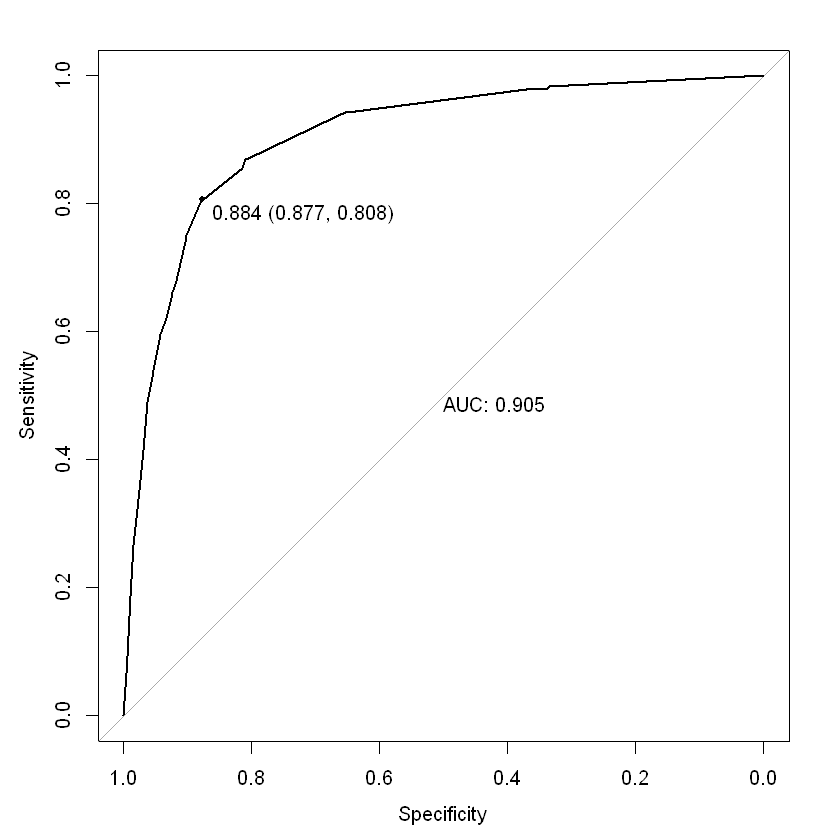

In [101]:
#GET AUC OF MODEL FOR BENCHMARKING
library(mlbench)
attributes(predi_knn)$prob
library(pROC)

roc(test$subscribe, attributes(predi_knn)$prob)

#PLOT AUC
plot(roc(test$subscribe, attributes(predi_knn)$prob),
     print.thres = T,
     print.auc=T)

# DECISION TREE- CLASSIFICATION

In [74]:
#LOAD AND INSTALL SOME PACKAGES 
library(ISLR)
data(package="ISLR")
install.packages('tree')
require(tree)

package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mmarcosiglesias\AppData\Local\Temp\Rtmp8E7Os4\downloaded_packages


Loading required package: tree



In [75]:
#Fit the model
tree= tree(formula = subscribe ~ .,data = train)

#summary *check misclassification error rate to know how many nodes were not identified as the most common class*
summary(tree)




Classification tree:
tree(formula = subscribe ~ ., data = train)
Variables actually used in tree construction:
[1] "nr.employed"      "contacted_or_not" "month"           
Number of terminal nodes:  4 
Residual mean deviance:  0.579 = 9261 / 16000 
Misclassification error rate: 0.1001 = 1601 / 16000 

In [76]:
#Apply gridsearch for optimal parameters to use using the method ctree
library(caret)
tree.c = train(form = subscribe ~ ., data = train, method = 'ctree')
tree.c


Conditional Inference Tree 

16000 samples
   19 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 16000, 16000, 16000, 16000, 16000, 16000, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy   Kappa    
  0.01          0.8865823  0.2752780
  0.50          0.8920409  0.2774899
  0.99          0.8967106  0.2589354

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.99.

In [77]:
#fit the model again with a range where the optimal mincriterion is in 

#https://stackoverflow.com/questions/66184113/grid-search-to-find-the-best-parameters-for-decision-tree-classification
set.seed(123)
classif = train(form = subscribe ~ ., 
                   data = train, 
                   method = 'ctree',
                   tuneGrid = data.frame(mincriterion =seq(0.90,0.1,length.out = 40)),
                   trControl = trainControl(method = "cv",
                                            summaryFunction = defaultSummary,
                                            verboseIter = TRUE))

+ Fold01: mincriterion=0.9000 
- Fold01: mincriterion=0.9000 
+ Fold01: mincriterion=0.8795 
- Fold01: mincriterion=0.8795 
+ Fold01: mincriterion=0.8590 
- Fold01: mincriterion=0.8590 
+ Fold01: mincriterion=0.8385 
- Fold01: mincriterion=0.8385 
+ Fold01: mincriterion=0.8179 
- Fold01: mincriterion=0.8179 
+ Fold01: mincriterion=0.7974 
- Fold01: mincriterion=0.7974 
+ Fold01: mincriterion=0.7769 
- Fold01: mincriterion=0.7769 
+ Fold01: mincriterion=0.7564 
- Fold01: mincriterion=0.7564 
+ Fold01: mincriterion=0.7359 
- Fold01: mincriterion=0.7359 
+ Fold01: mincriterion=0.7154 
- Fold01: mincriterion=0.7154 
+ Fold01: mincriterion=0.6949 
- Fold01: mincriterion=0.6949 
+ Fold01: mincriterion=0.6744 
- Fold01: mincriterion=0.6744 
+ Fold01: mincriterion=0.6538 
- Fold01: mincriterion=0.6538 
+ Fold01: mincriterion=0.6333 
- Fold01: mincriterion=0.6333 
+ Fold01: mincriterion=0.6128 
- Fold01: mincriterion=0.6128 
+ Fold01: mincriterion=0.5923 
- Fold01: mincriterion=0.5923 
+ Fold01

Selecting tuning parameters
Fitting mincriterion = 0.428 on full training set


In [78]:
#print out the tree details
print(classif)

Conditional Inference Tree 

16000 samples
   19 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 14400, 14400, 14400, 14400, 14400, 14401, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy   Kappa    
  0.1000000     0.8986877  0.3043715
  0.1205128     0.8988127  0.3034573
  0.1410256     0.8994378  0.3058590
  0.1615385     0.8996254  0.3064242
  0.1820513     0.8996254  0.3061229
  0.2025641     0.8995003  0.3027526
  0.2230769     0.8995003  0.3036866
  0.2435897     0.8997504  0.3036578
  0.2641026     0.8998128  0.3033657
  0.2846154     0.8998128  0.3029433
  0.3051282     0.8998128  0.3029433
  0.3256410     0.8997503  0.3023087
  0.3461538     0.8998128  0.3007194
  0.3666667     0.8998128  0.3007194
  0.3871795     0.9000003  0.3012844
  0.4076923     0.9002503  0.3007573
  0.4282051     0.9002503  0.3007573
  0.4487179     0.9001878  0.2996045
  0.4692308     0.9001878  0.2991548


In [106]:
# Make predictions on test
prob_test <- classif %>% predict(test, type = "prob")
predict_113 <- ifelse(prob_test > 0.5, 1, 0)

# Model accuracy
mean(predict_113 == test$subscribe)

[1] 0.5

In [103]:
# Make predictions on train
prob_tes <- classif %>% predict(train, type = "prob")
predict_112 <- ifelse(prob_tes > 0.5, 1, 0)

# Model accuracy
mean(predict_112 == train$subscribe)

[1] 0.5

In [104]:
#GET AUC OF MODEL FOR BENCHMARKING

library(mlbench)
library(pROC)
prediction_t = classif%>%predict(test)

pred_r <- pROC::roc(as.numeric(prediction_t), as.numeric(test$subscribe == 1))

pred_a <- pROC::auc(pred_r)

Setting levels: control = 1, case = 2

Setting direction: controls < cases



In [107]:
#Print AUC
print(paste('AUC =', pred_a))

[1] "AUC = 0.826450216450216"


# RANDOM FOREST

In [119]:
# Load required libaries and data
library(randomForest)  # Random Forests model


In [120]:
# Fit random forests model
set.seed(123)
md_rf <- randomForest(subscribe ~ ., data=train, mtry=6, importance=T)  # Default mtry = p/3
md_rf


Call:
 randomForest(formula = subscribe ~ ., data = train, mtry = 6,      importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 10.3%
Confusion matrix:
      0   1 class.error
0 13866 336  0.02365864
1  1312 486  0.72969967

In [121]:
# Feature importance
importance(md_rf)

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
age,30.715252,0.6852148,29.152482,466.10575
job,36.652369,-2.3802343,33.924365,294.51412
marital,8.758876,-8.0122225,5.480161,117.62071
education,26.440146,-4.8631609,23.276769,226.64458
default,8.681146,-3.3156543,7.595265,43.11913
housing,2.129490,-1.4516635,1.373630,97.15007
loan,1.509340,0.4178776,1.541291,72.09787
contact,20.602132,8.8474713,22.422988,39.52745
month,30.291514,-14.7752046,30.501331,106.19607
day_of_week,28.064283,1.6062785,28.412356,206.51596


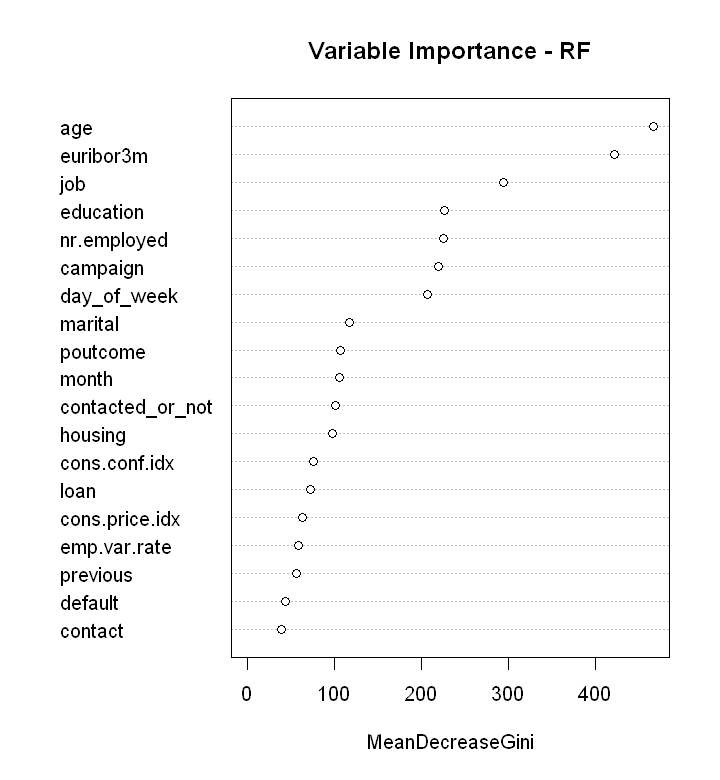

In [122]:
# Plot feature importance
options(repr.plot.width=6, repr.plot.height=6.5)
varImpPlot(md_rf, type=2, main='Variable Importance - RF')


In [123]:
#fit model again with important variables identified previously
set.seed(123)
md_rf_1 <- randomForest(subscribe ~ euribor3m+ age+ job+nr.employed+ education+day_of_week+
                          campaign+month+marital+housing, data=train, mtry=6, importance=T)  # Default mtry = p/3
md_rf_1


Call:
 randomForest(formula = subscribe ~ euribor3m + age + job + nr.employed +      education + day_of_week + campaign + month + marital + housing,      data = train, mtry = 6, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 11.52%
Confusion matrix:
      0   1 class.error
0 13689 513  0.03612167
1  1330 468  0.73971079

In [128]:
#get predictions on test
prob_tes_k <- md_rf_1 %>% predict(test, type = "response")
predict_114 <- ifelse(prob_tes_k > 0.5, 1, 0)

# Model accuracy
mean(prob_tes_k == test$subscribe)

Warning message in Ops.factor(prob_tes_k, 0.5):
"'>' not meaningful for factors"


[1] 0.889

In [129]:
#get predictions on test
prob_test_k <- md_rf_1 %>% predict(train, type = "response")
predict_115 <- ifelse(prob_test_k > 0.5, 1, 0)

# Model accuracy
mean(prob_test_k == train$subscribe)

Warning message in Ops.factor(prob_test_k, 0.5):
"'>' not meaningful for factors"


[1] 0.9940625

In [130]:
#GET AUC
library(mlbench)
library(pROC)
prediction_tr = md_rf_1%>%predict(test)

pred_ro <- pROC::roc(as.numeric(prediction_tr), as.numeric(test$subscribe == 1))

pred_au <- pROC::auc(pred_ro)

print(paste('AUC =', pred_au))

Setting levels: control = 1, case = 2

Setting direction: controls < cases



[1] "AUC = 0.73313969017094"


In [91]:
write.csv(bank_final,"C:/Users/mmarcosiglesias/OneDrive - IESEG/Desktop/Machine Learning Individual Assignment/bank_train.csv")

In [92]:
write.csv(bank_final_test, "C:/Users/mmarcosiglesias/OneDrive - IESEG/Desktop/Machine Learning Individual Assignment/bank_test.csv")